## Classifier
This notebook is used to create a classifier that can classify between plank and squat exercises.

### Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Plank and Squat Data
labeling them as 0 and 1 respectively and combining them

In [28]:
plank_df = pd.read_csv('../Plank/train.csv')

squat_df = pd.read_csv('../Squat/squatdata.csv')

# Get the list of columns for each DataFrame
train_columns = plank_df.columns.tolist()
squat_columns = squat_df.columns.tolist()

# Find the common columns
common_columns = list(set(train_columns).intersection(squat_columns))

# Filter both DataFrames to keep only the common columns
train_df_filtered = plank_df[common_columns]
squat_df_filtered = squat_df[common_columns]

# Drop the existing 'label' column from both DataFrames
train_df_filtered.drop('label', axis=1, inplace=True)
squat_df_filtered.drop('label', axis=1, inplace=True)

# Add a new 'label' column to train_df_filtered with all values set to 0
train_df_filtered['label'] = 0

# Add a new 'label' column to squat_df_filtered with all values set to 1
squat_df_filtered['label'] = 1

# Combine the two filtered DataFrames
data = pd.concat([train_df_filtered, squat_df_filtered], ignore_index=True)

# Separate features and target variable
X = data.drop('label', axis=1)
y = data['label']

In [29]:
data['label'].value_counts()

label
0    29230
1     5013
Name: count, dtype: int64

In [30]:

# Initial check for NaN values
print("NaN values before cleaning:")
print(data.isnull().sum())

# Drop rows with NaN values (excluding the 'label' column)
data.dropna(subset=data.columns.difference(['label']), inplace=True)

# Check for NaN values in the 'label' column
print("nNaN values in 'label' column:")
print(data['label'].isnull().sum())

# Drop rows with NaN values in the 'label' column
data.dropna(subset=['label'], inplace=True)

# Check data types and look for inconsistencies
print("nData types:")
print(data.info())

# Perform any calculations or transformations here

# Check for NaN values again after transformations
print("nNaN values after transformations:")
print(data.isnull().sum())

NaN values before cleaning:
right_hip_v         0
left_ankle_y        0
left_ankle_v        0
nose_y              0
left_shoulder_v     0
left_hip_x          0
left_shoulder_y     0
right_shoulder_z    0
right_shoulder_x    0
left_knee_x         0
right_shoulder_v    0
nose_z              0
right_ankle_v       0
left_hip_y          0
nose_v              0
right_hip_x         0
left_shoulder_z     0
left_knee_y         0
right_knee_y        0
right_hip_y         0
right_shoulder_y    0
left_knee_v         0
right_knee_v        0
left_ankle_x        0
right_knee_z        0
left_hip_z          0
left_shoulder_x     0
left_ankle_z        0
right_hip_z         0
right_ankle_y       0
right_ankle_x       0
nose_x              0
right_knee_x        0
left_hip_v          0
right_ankle_z       0
left_knee_z         0
label               0
dtype: int64
nNaN values in 'label' column:
0
nData types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34243 entries, 0 to 34242
Data columns (total 37 

### Feature Engineering

In [31]:
data

,right_hip_v,left_ankle_y,left_ankle_v,nose_y,left_shoulder_v,left_hip_x,left_shoulder_y,right_shoulder_z,right_shoulder_x,left_knee_x,...,left_ankle_z,right_hip_z,right_ankle_y,right_ankle_x,nose_x,right_knee_x,left_hip_v,right_ankle_z,left_knee_z,label
0,0.996811,0.444226,0.818661,0.435841,0.999743,0.498838,0.341100,0.198258,0.296270,0.647718,...,-0.004384,0.114232,0.420560,0.789818,0.241842,0.644682,0.998106,0.173141,-0.067527,0
1,0.996992,0.451912,0.833937,0.440657,0.999759,0.499674,0.339355,0.197161,0.296200,0.651548,...,0.006570,0.113985,0.421224,0.794588,0.237662,0.649158,0.998226,0.182843,-0.060868,0
2,0.997015,0.452804,0.833292,0.441506,0.999762,0.501407,0.340742,0.197256,0.295690,0.652140,...,0.008551,0.114043,0.419406,0.794849,0.237591,0.650082,0.998246,0.185291,-0.061478,0
3,0.997085,0.449354,0.839367,0.441322,0.999760,0.502167,0.339990,0.198342,0.295731,0.653057,...,0.001883,0.114130,0.416195,0.798330,0.238127,0.652118,0.998276,0.177301,-0.066214,0
4,0.997149,0.448811,0.843560,0.440833,0.999760,0.502102,0.343735,0.201817,0.295011,0.652161,...,-0.003432,0.114259,0.415271,0.798766,0.238066,0.651391,0.998289,0.171845,-0.068594,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34238,0.999797,0.739908,0.987645,0.090363,0.999982,0.443725,0.180879,-0.060793,0.368265,0.448693,...,-0.043127,0.020070,0.751272,0.403436,0.407681,0.397782,0.999753,0.135333,-0.099989,1
34239,0.999784,0.740407,0.986913,0.086621,0.999983,0.440502,0.178047,-0.072582,0.361666,0.438697,...,-0.025684,0.016641,0.751742,0.403065,0.403316,0.397347,0.999738,0.043211,-0.090030,1
34240,0.999730,0.738969,0.980069,0.081523,0.999983,0.436157,0.175864,-0.120354,0.358344,0.429529,...,-0.073337,0.016293,0.752917,0.404907,0.399570,0.397867,0.999709,0.034485,-0.136932,1
34241,0.999681,0.742109,0.954389,0.075364,0.999981,0.432882,0.171554,-0.100547,0.355112,0.418146,...,-0.206554,0.028257,0.752424,0.406328,0.396185,0.395421,0.999707,0.020928,-0.206258,1


In [32]:
X = data.drop(['label'], axis=1)
y = data['label']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Model Building

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5846
           1       1.00      1.00      1.00      1003

    accuracy                           1.00      6849
   macro avg       1.00      1.00      1.00      6849
weighted avg       1.00      1.00      1.00      6849



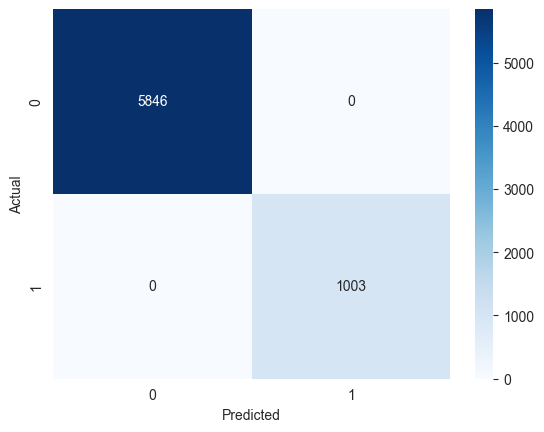

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

# plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, y_pred))


In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

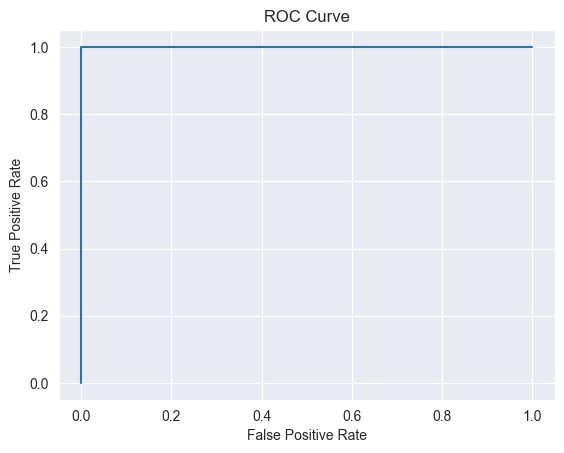

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve

# plot ROC curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Model Serialization

In [42]:
import joblib

joblib.dump(model, '/Users/defeee/Documents/GitHub/FormAI-ML/Models/Core/Classifier/classifier.pkl')

['/Users/defeee/Documents/GitHub/FormAI-ML/Models/Core/Classifier/classifier.pkl']

In [43]:
# print the remaining columns
data.columns.tolist()

['right_hip_v',
 'left_ankle_y',
 'left_ankle_v',
 'nose_y',
 'left_shoulder_v',
 'left_hip_x',
 'left_shoulder_y',
 'right_shoulder_z',
 'right_shoulder_x',
 'left_knee_x',
 'right_shoulder_v',
 'nose_z',
 'right_ankle_v',
 'left_hip_y',
 'nose_v',
 'right_hip_x',
 'left_shoulder_z',
 'left_knee_y',
 'right_knee_y',
 'right_hip_y',
 'right_shoulder_y',
 'left_knee_v',
 'right_knee_v',
 'left_ankle_x',
 'right_knee_z',
 'left_hip_z',
 'left_shoulder_x',
 'left_ankle_z',
 'right_hip_z',
 'right_ankle_y',
 'right_ankle_x',
 'nose_x',
 'right_knee_x',
 'left_hip_v',
 'right_ankle_z',
 'left_knee_z',
 'label']